In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [74]:
df.size

1200

In [75]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [77]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [78]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.drop(['User ID'],axis=1,inplace=True)

In [81]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


#**Age vs Sleep quality analysis**

In [82]:
df_age_sleepquality_corr=df[['Age','Sleep Quality']].corr()
df_age_sleepquality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [83]:
df_age_sleepquality_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


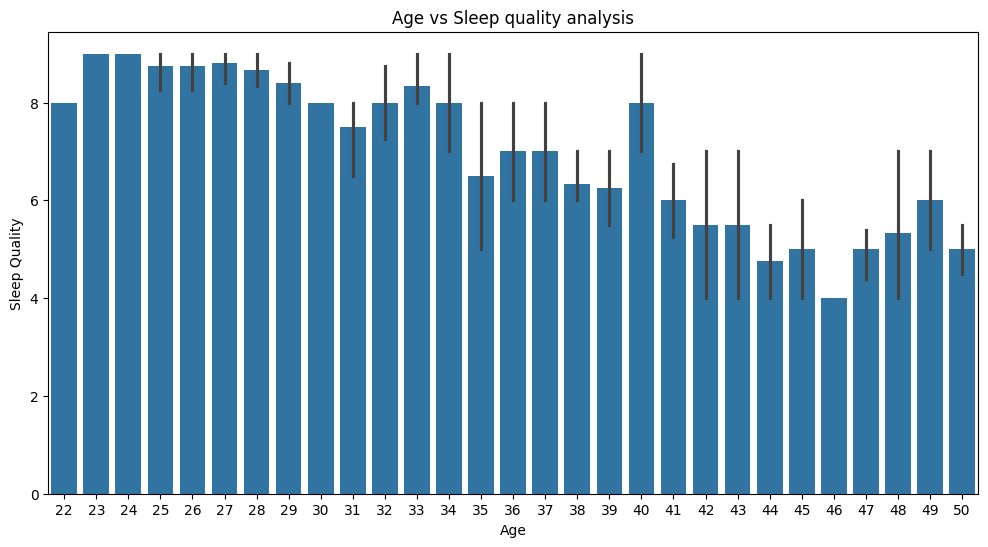

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.title('Age vs Sleep quality analysis')
plt.show()

In [85]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()
x=df[['Age']]
y=df['Sleep Quality']
age_sleep_quality_model.fit(x,y)

LinearRegression()

In [86]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190648)

In [87]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [88]:
age_sleep_quality_model_predictions=age_sleep_quality_model.predict(x)

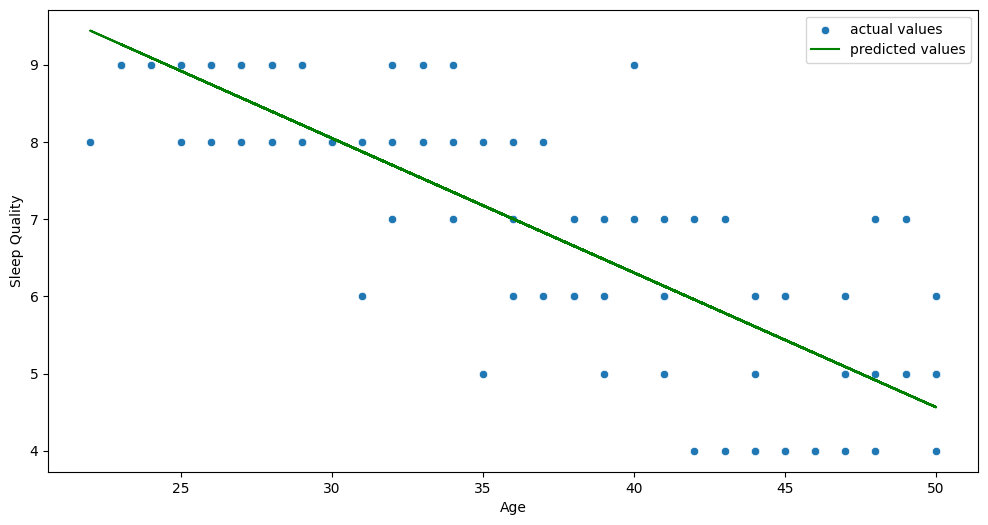

In [89]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',data=df,label='actual values')
plt.plot(x,age_sleep_quality_model_predictions,color='green',label="predicted values")
plt.legend()
plt.show()

#**Physical activity vs Sleep quality**

In [90]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [91]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [92]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


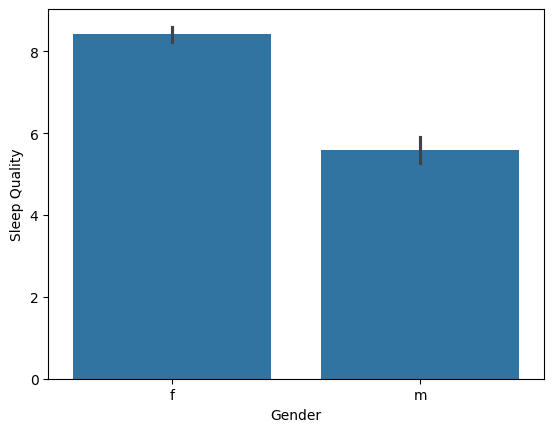

In [93]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)
plt.show()

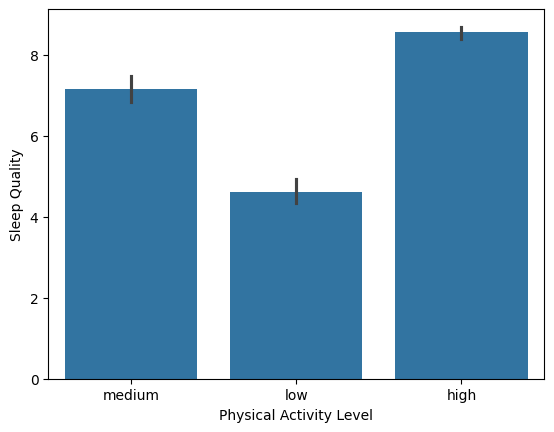

In [94]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data=df)
plt.show()

In [95]:
custom_codes={'low':1,'medium':2,'high':3}
df['Physical Activity Level']=df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


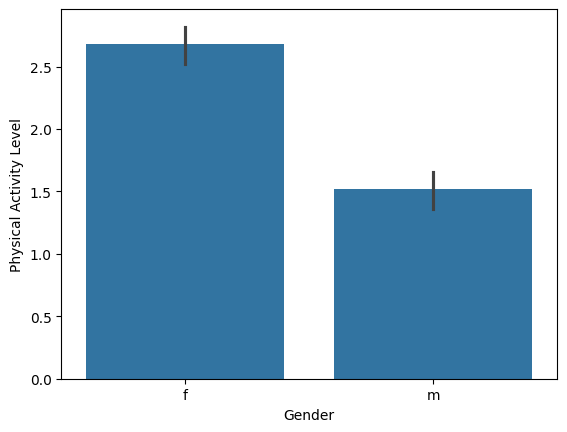

In [26]:
sns.barplot(x='Gender',y='Physical Activity Level',data=df)
plt.show()

#**Lets find t and p values for sleep quality vs gender & physical activity vs gender**

In [27]:
from scipy import stats

In [28]:
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender']=='f']['Sleep Quality']

physical_activity_males=df[df['Gender']=='m']['Physical Activity Level']
physical_activity_females=df[df['Gender']=='f']['Physical Activity Level']


In [31]:
t_sleep_quality,p_sleep_quality=stats.ttest_ind(sleep_quality_males,sleep_quality_females)

print(f"t value for sleep quality vs gender is {t_sleep_quality:.2f}")
print(f"p value for sleep quality vs gender is {p_sleep_quality:.2f}")

t value for sleep quality vs gender is -14.32
p value for sleep quality vs gender is 0.00


In [33]:
t_physical_activity,p_physical_activity=stats.ttest_ind(physical_activity_males,physical_activity_females)

print(f"t value for physical activity vs gender is {t_physical_activity:.2f}")
print(f"p value for physical activity vs gender is {p_physical_activity:.2f}")


t value for physical activity vs gender is -10.98
p value for physical activity vs gender is 0.00


#**Time of sleep & waking up vs Sleep quality**

In [96]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [35]:
df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


#**Use of helper func to convert time**

In [97]:
def helper_func(str_time):
  h=str_time.split(":")[0]
  m=str_time.split(":")[1]
  return int(h) + int(m)/60

In [98]:
df['Bedtime']=df['Bedtime'].apply(helper_func)
df['Wake-up Time']=(df['Wake-up Time'].apply(helper_func))

df['Bedtime'].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [40]:
df['sleep_duration']=(df['Wake-up Time']-df['Bedtime'])%24
df['sleep_duration'].head()

,sleep_duration
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

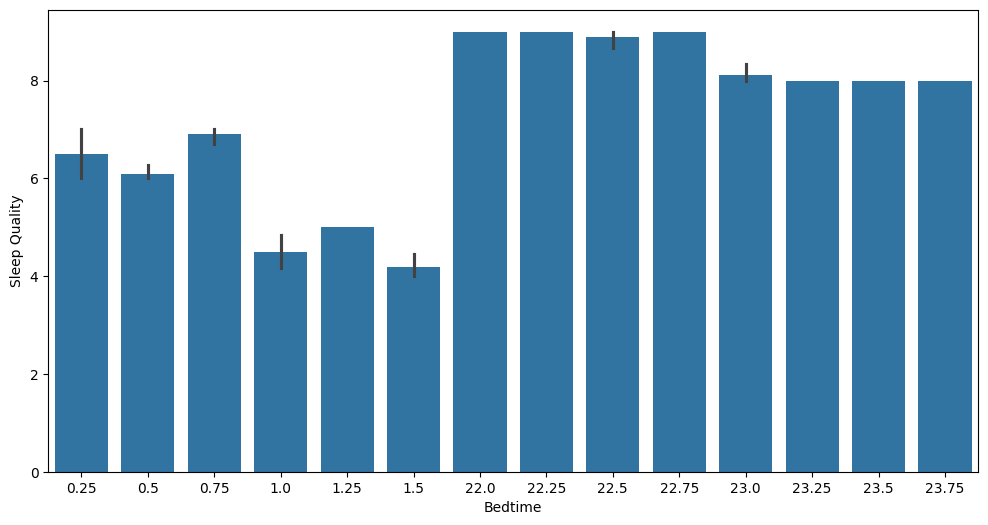

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime',y='Sleep Quality',data=df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

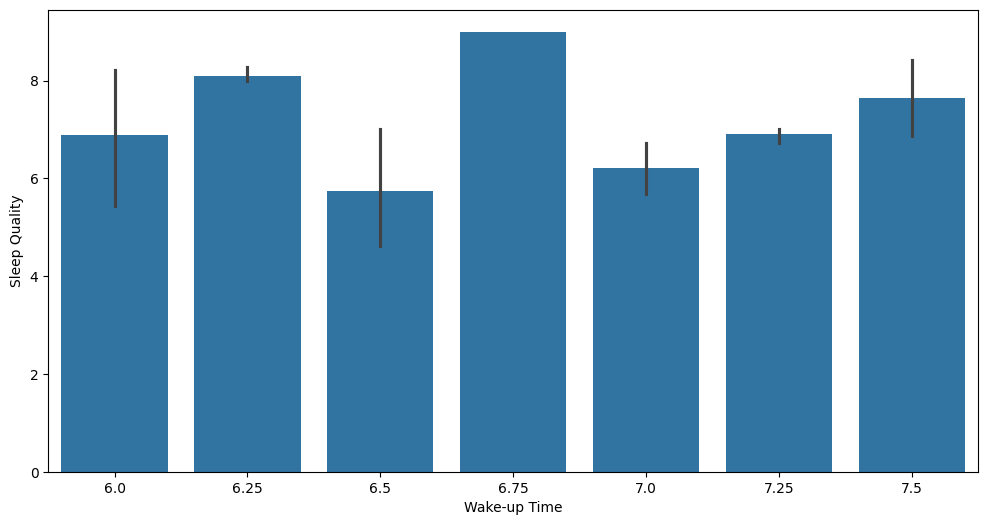

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time',y='Sleep Quality',data=df)

<Axes: xlabel='sleep_duration', ylabel='Sleep Quality'>

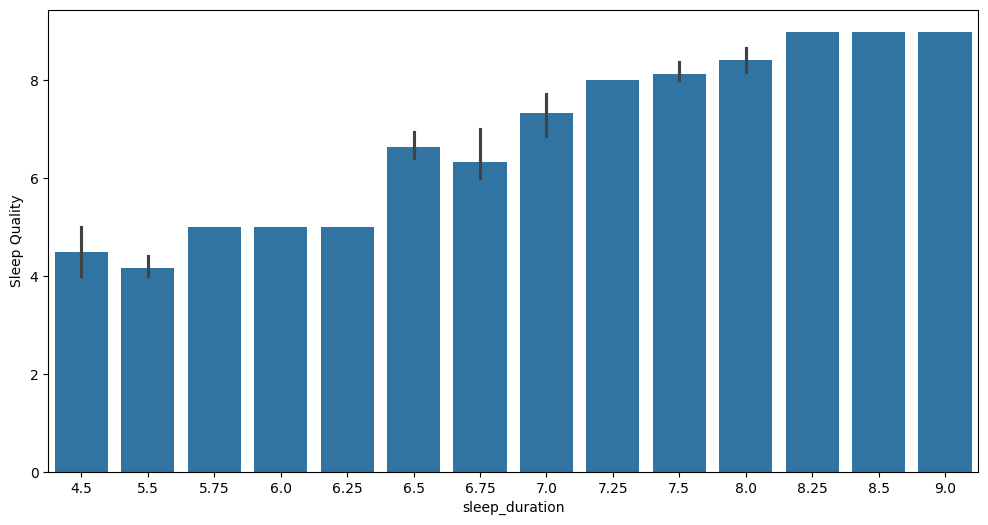

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x='sleep_duration',y='Sleep Quality',data=df)

#**create a linear regression model for comparing sleep quality vs sleep duration**

In [45]:
sleep_duration_model=LinearRegression()
x=df[['sleep_duration']]
y=df['Sleep Quality']
sleep_duration_model.fit(x,y)

LinearRegression()

In [48]:
sleep_duration_model.intercept_

np.float64(-2.575599349763152)

In [49]:
sleep_duration_model.coef_

array([1.36940999])

In [46]:
sleep_duration_model_predictions=sleep_duration_model.predict(x)

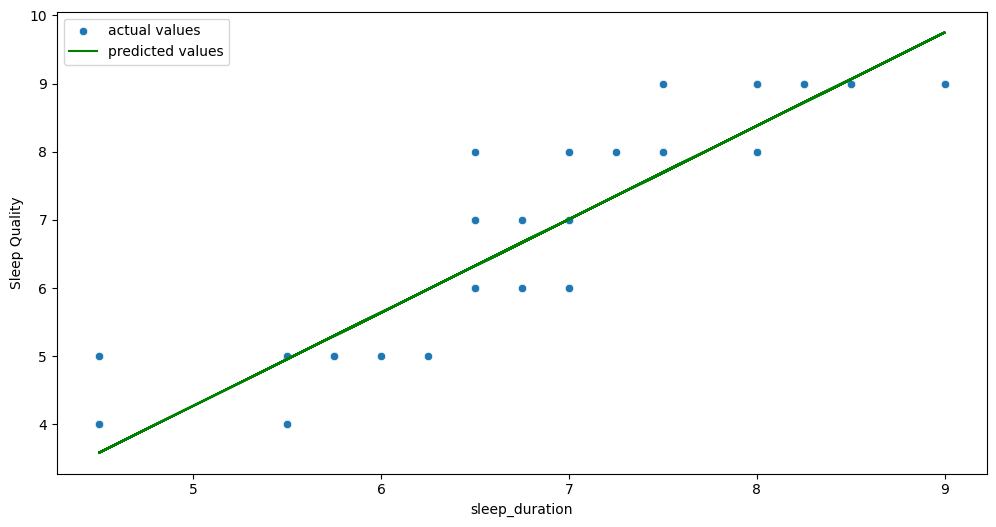

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sleep_duration',y='Sleep Quality',data=df,label='actual values')
plt.plot(x,sleep_duration_model_predictions,color='green',label='predicted values')
plt.legend()
plt.show()

#**sleep disorders vs sleep quality**

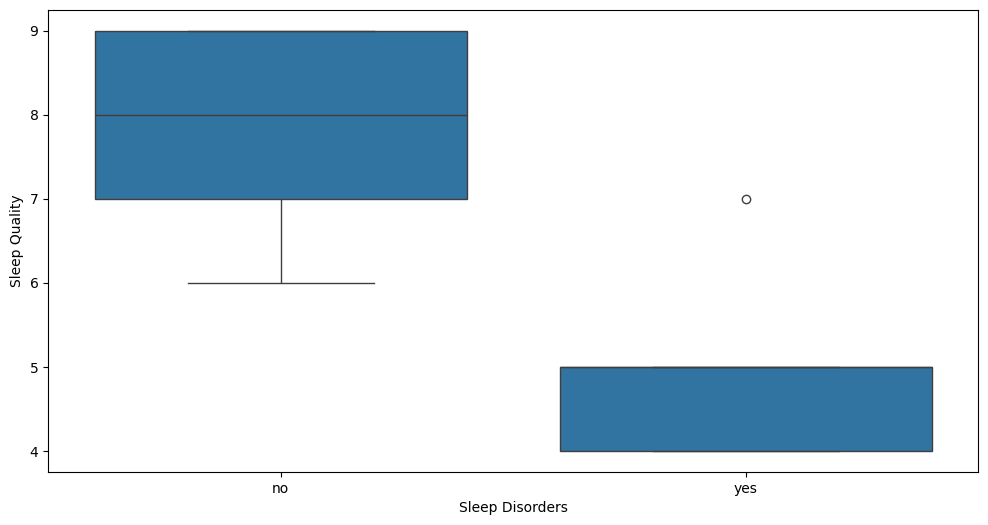

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sleep Disorders',y='Sleep Quality',data=df)
plt.show()

#get all numeric data

In [52]:
df_numeric_features=df.select_dtypes(include=['int64','float64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,sleep_duration
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


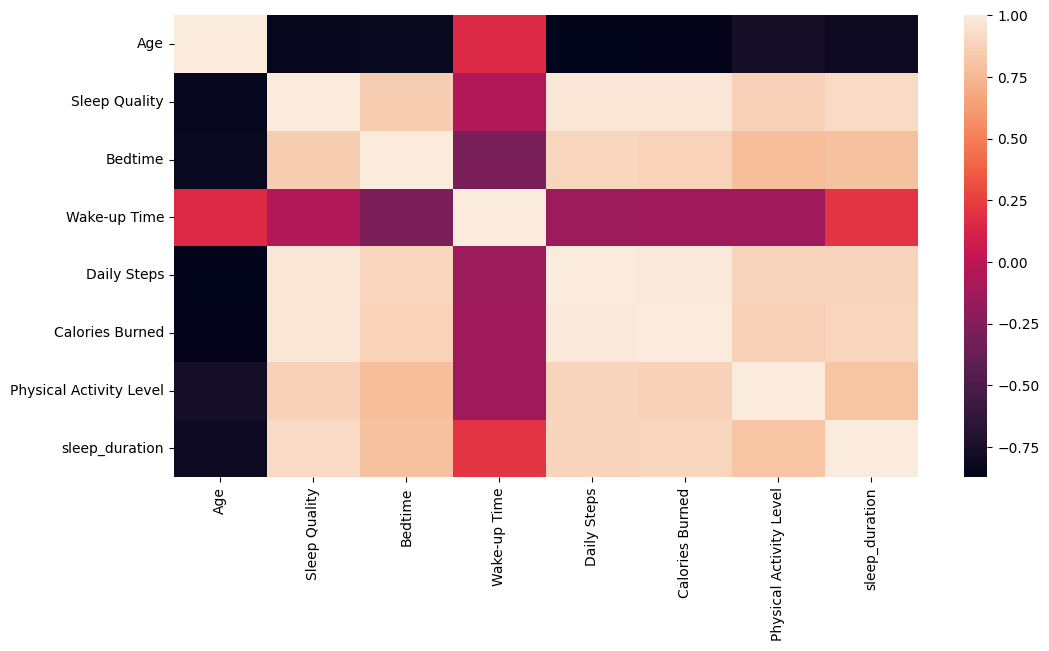

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_features.corr())
plt.show()

#**daily steps vs sleep quality**

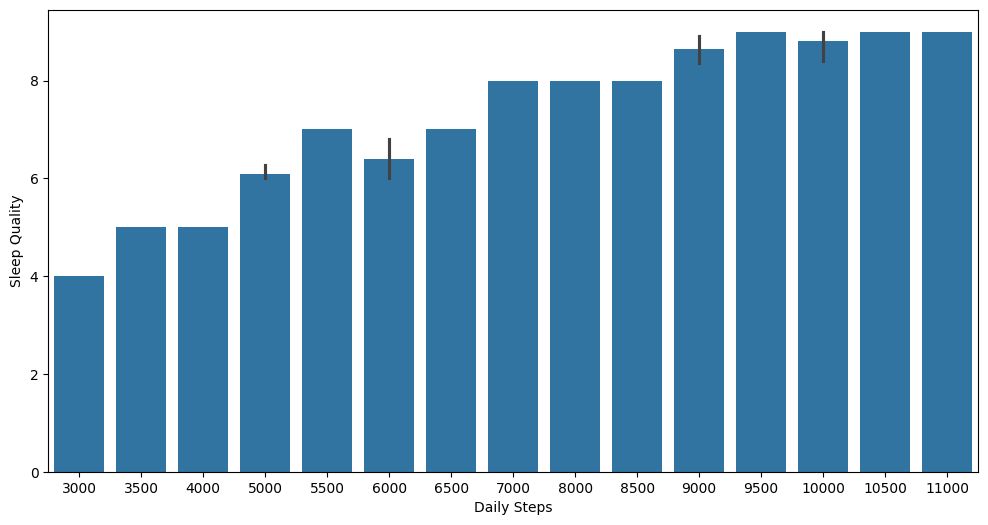

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='Daily Steps',y='Sleep Quality',data=df)
plt.show()

In [55]:
daily_steps_model=LinearRegression()
x=df[['Daily Steps']]
y=df['Sleep Quality']
daily_steps_model.fit(x,y)

LinearRegression()

In [56]:
daily_steps_model_predictions=daily_steps_model.predict(x)

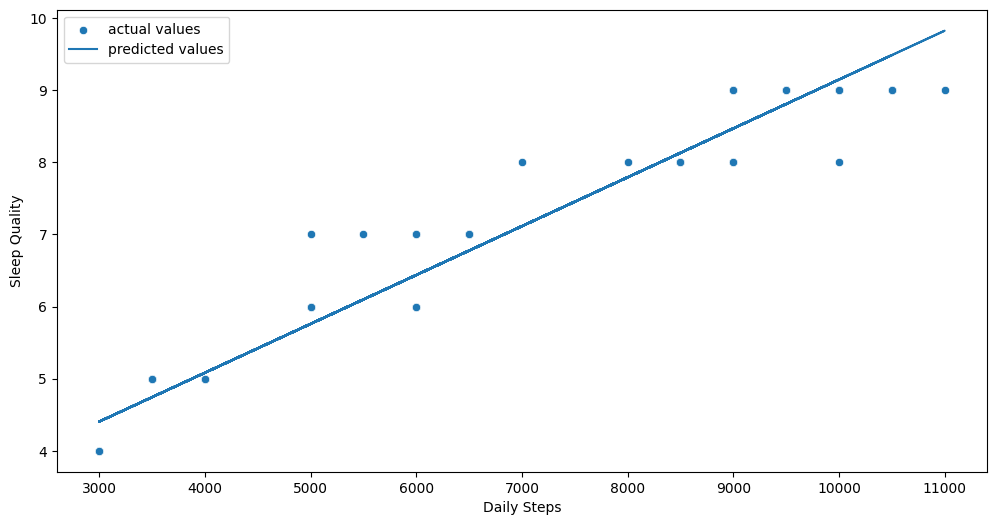

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Daily Steps',y='Sleep Quality',data=df,label='actual values')
plt.plot(x,daily_steps_model_predictions,data=df,label='predicted values')
plt.legend()
plt.show()


#**calories burned vs sleep quality**

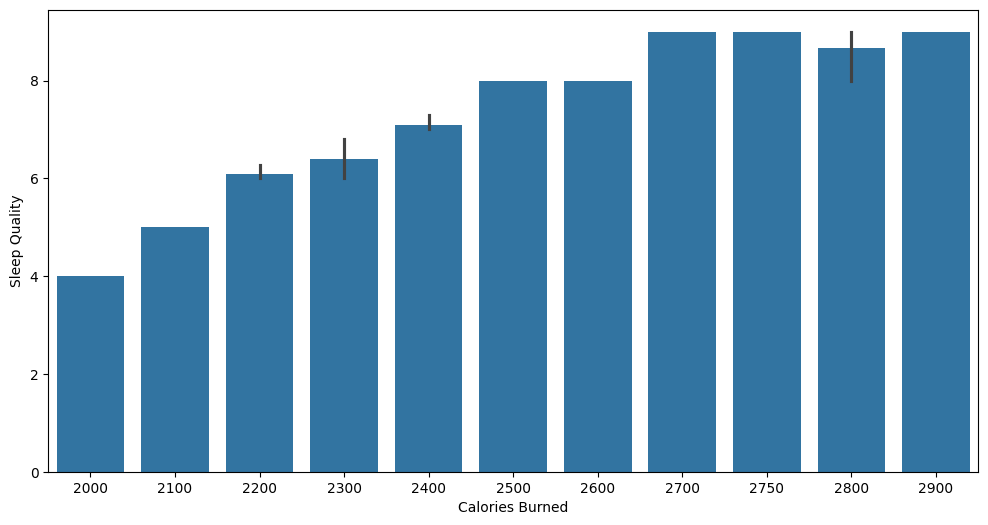

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='Calories Burned',y='Sleep Quality',data=df)
plt.show()

In [102]:
calories_burned_model=LinearRegression()
x=df[['Calories Burned']]
y=df['Sleep Quality']
calories_burned_model.fit(x,y)
calories_burned_model_predictions=calories_burned_model.predict(x)

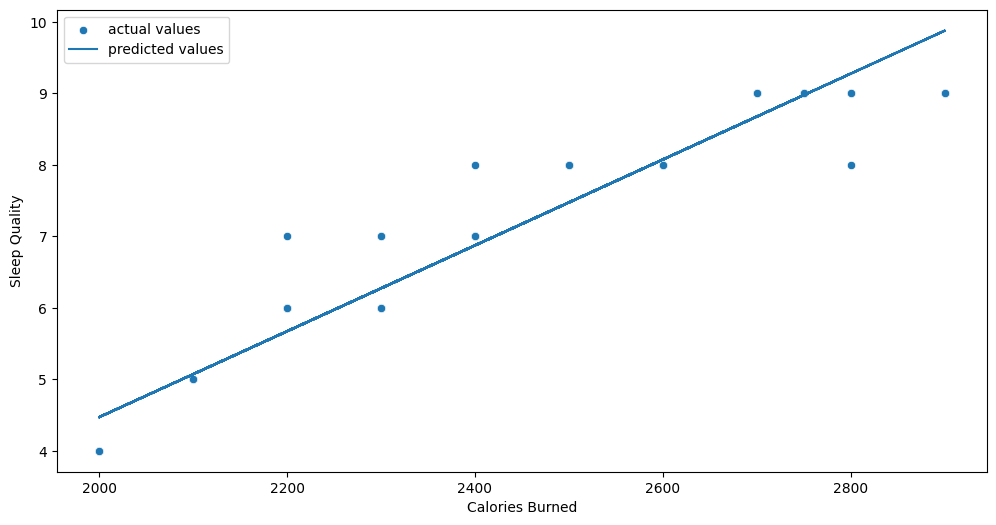

In [103]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Calories Burned',y='Sleep Quality',data=df,label='actual values')
plt.plot(x,calories_burned_model_predictions,data=df,label='predicted values')
plt.legend()
plt.show()

#**dietary habits vs sleep quality**

In [117]:
df['Dietary Habits'].head()

,Dietary Habits
0,healthy
1,unhealthy
2,healthy
3,unhealthy
4,medium


In [118]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [119]:
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,3,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,1,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,3,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,1,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,2,no,no


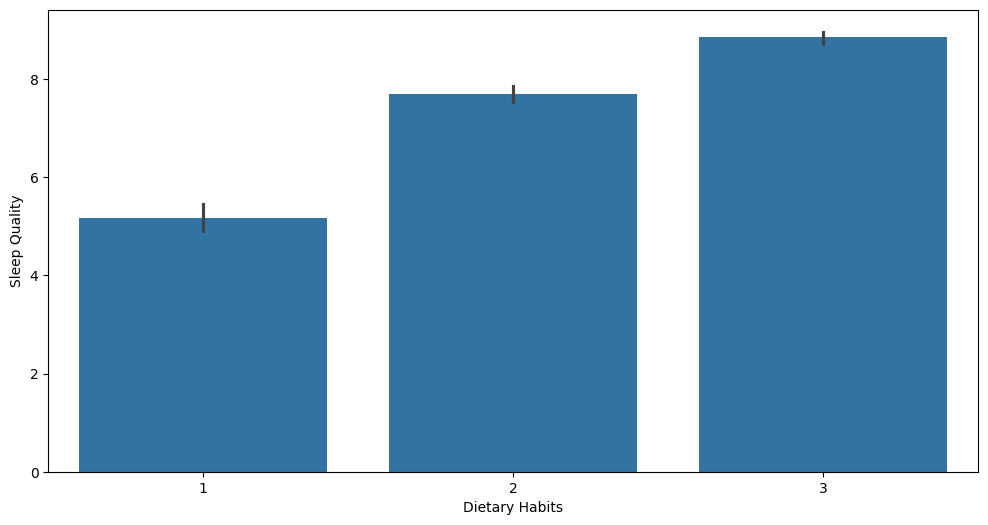

In [120]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

#**Sleep Disorder vs Sleep Quality**

In [121]:
df['Sleep Disorders'].head()

,Sleep Disorders
0,no
1,yes
2,no
3,yes
4,no


In [122]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality': ['mean', 'std'],
    'Physical Activity Level': lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)

                Sleep Quality               Physical Activity Level
                         mean       std                    <lambda>
Sleep Disorders                                                    
no                   7.837838  1.085736  {'medium': 38, 'high': 36}
yes                  4.615385  0.697247                 {'low': 26}


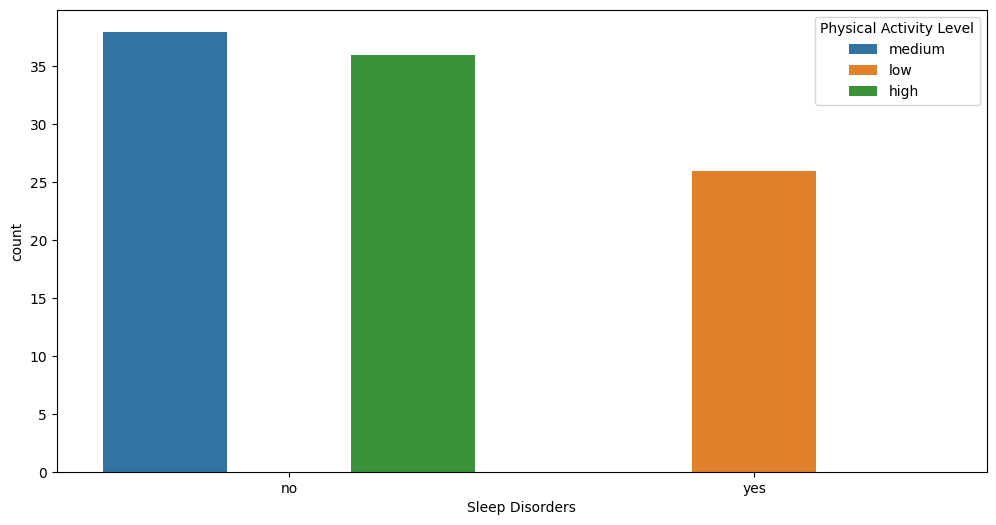

In [123]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Sleep Disorders', hue = 'Physical Activity Level', data = df)
plt.show()

#**Summary**

In [124]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality      1.000000
Daily Steps        0.976277
Calories Burned    0.973557
Dietary Habits     0.902498
User ID           -0.014248
Age               -0.848356
Name: Sleep Quality, dtype: float64


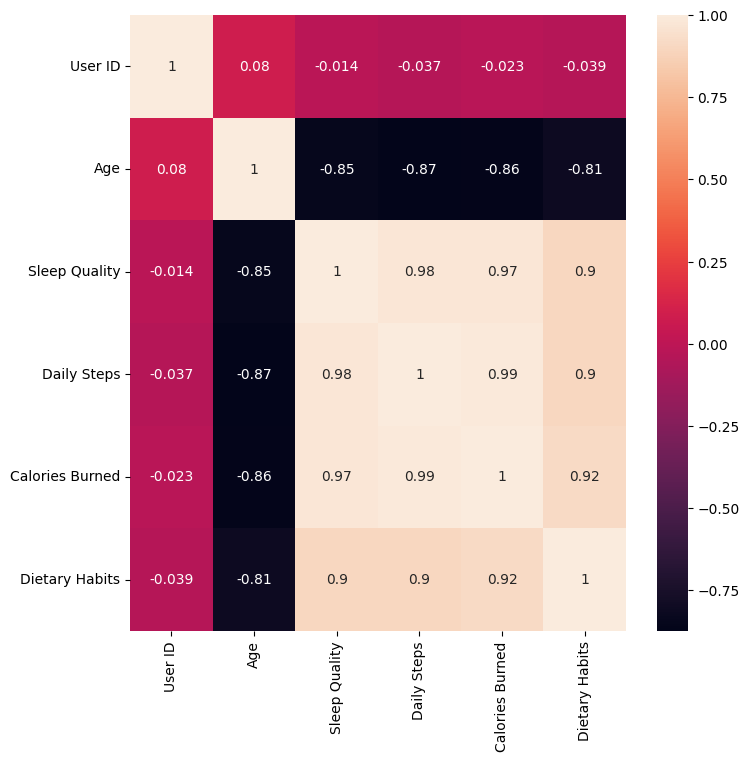

In [125]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()